# **Import Libraries**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# **Loading Data & View Dataframe**

In [51]:
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)
df

,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
0,2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,0.421011,0.997131,none,47.108800,9214.535081,9196.119258,9524.945856,9671.528810,43
1,2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,0.366354,0.999726,none,48.843088,9202.486065,9206.292278,9560.413230,9718.271795,41
2,2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,0.404649,1.000724,buy,50.404638,9197.158852,9216.465298,9595.880603,9765.014781,44
3,2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,0.409607,1.000859,none,53.054470,9200.301081,9226.638318,9631.347977,9811.757766,41
4,2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,0.437860,1.000647,none,49.099864,9192.450865,9236.811338,9666.815351,9858.500751,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2023-02-01,23127.15,23813.57,22760.00,23735.97,20292.224170,2.228658e+06,0.010046,1.197895,3.665064e+08,0.165202,1.053647,1.043648,none,73.827696,23052.123348,21916.623693,20118.284733,21237.270436,56
931,2023-02-02,23735.97,24262.18,23367.87,23493.84,16368.921383,2.225632e+06,0.017552,1.185242,1.677386e+08,0.156290,1.103838,1.027135,none,70.357821,23140.466679,22060.006994,20250.659449,21259.723865,60
932,2023-02-03,23497.29,23720.00,23208.01,23433.54,14215.668430,2.221115e+06,0.012482,1.181964,1.003611e+08,0.153951,1.009916,1.021413,none,69.481991,23199.081343,22184.873631,20375.478294,21281.353876,60
933,2023-02-04,23433.47,23589.67,23257.71,23328.87,3567.130075,2.219863e+06,0.007240,1.176299,1.410151e+08,0.149876,1.028088,1.028341,none,67.901909,23225.039074,22288.873301,20491.297577,21301.727171,58


**Total Rows & Columns**

In [52]:
df.shape

(935, 20)

**Data Information**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 935 non-null    object 
 1   open                     935 non-null    float64
 2   high                     935 non-null    float64
 3   low                      935 non-null    float64
 4   close                    935 non-null    float64
 5   volume                   935 non-null    float64
 6   reserve                  935 non-null    float64
 7   funding_rates            935 non-null    float64
 8   mvrv                     935 non-null    float64
 9   nrpl                     935 non-null    float64
 10  nupl                     935 non-null    float64
 11  stock_to_flow_reversion  935 non-null    float64
 12  sth_sopr                 935 non-null    float64
 13  signal                   935 non-null    object 
 14  RSI                      9

# **Data preprocessing**

**Duplicate Values**

In [54]:
len(df[df.duplicated()])

0

**Missing Values/Null Values**

In [55]:
print(df.isnull().sum())

datetime                   0
open                       0
high                       0
low                        0
close                      0
volume                     0
reserve                    0
funding_rates              0
mvrv                       0
nrpl                       0
nupl                       0
stock_to_flow_reversion    0
sth_sopr                   0
signal                     0
RSI                        0
9_ema                      0
21_ema                     0
50_ema                     0
200_ema                    0
Fear_and_Greed_Index       0
dtype: int64


**Visualizing the missing values using heatmap**

<Axes: >

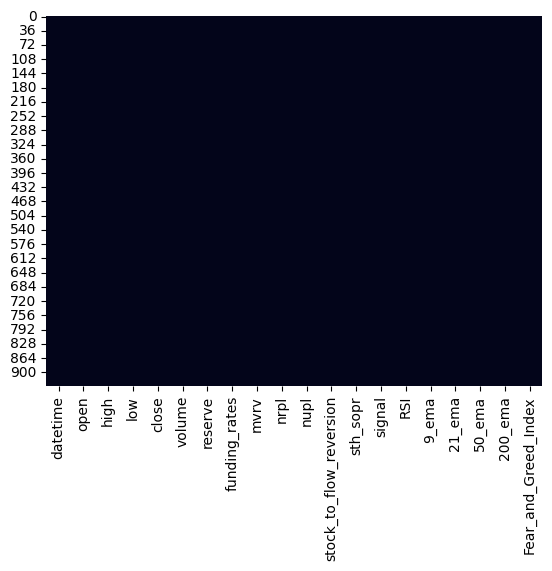

In [56]:
sns.heatmap(df.isnull(), cbar=False)

**Variable Information**

In [57]:
df.columns

Index(['datetime', 'open', 'high', 'low', 'close', 'volume', 'reserve',
       'funding_rates', 'mvrv', 'nrpl', 'nupl', 'stock_to_flow_reversion',
       'sth_sopr', 'signal', 'RSI', '9_ema', '21_ema', '50_ema', '200_ema',
       'Fear_and_Greed_Index'],
      dtype='object')

**Describe Statistics**

In [58]:
df.describe(include='all')

,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
count,935,935.000000,935.000000,935.000000,935.000000,935.000000,9.350000e+02,935.000000,935.000000,9.350000e+02,935.000000,935.000000,935.000000,935,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
unique,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,771,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,32854.990235,33748.030417,31841.441326,32869.649166,19776.787469,2.655477e+06,0.010833,1.887077,2.638039e+08,0.364061,1.587759,1.005996,NaN,52.406224,32810.048490,32729.191448,32582.628701,32110.411317,45.706952
std,NaN,15586.619424,16026.828089,15051.951866,15570.876889,12739.460780,1.542206e+05,0.023959,0.773880,9.690276e+08,0.282549,0.797501,0.031463,NaN,14.396264,15497.199601,15382.324826,14982.202215,12293.601467,25.749944
min,NaN,9130.930000,9182.990000,9005.000000,9130.110000,3211.704593,2.214551e+06,-0.116700,0.759394,-4.302549e+09,-0.316839,0.366354,0.866222,NaN,20.285894,9192.450865,9196.119258,9524.945856,9671.528810,6.000000
25%,NaN,19239.850000,19554.870000,18850.245000,19258.600000,11166.544857,2.596823e+06,-0.000010,1.172578,-1.718159e+08,0.147169,0.905744,0.989412,NaN,41.382874,19322.981514,19417.071530,19207.403858,21255.649974,24.000000
50%,NaN,33077.430000,34231.540000,31432.190000,33080.660000,16961.108288,2.689092e+06,0.005040,1.806507,6.615847e+07,0.446445,1.483322,1.000418,NaN,50.496180,33560.442757,33620.120486,34805.448787,34449.423397,39.000000
75%,NaN,45709.475000,47058.655000,44145.240000,45705.135000,24086.969086,2.753680e+06,0.012384,2.382392,4.871924e+08,0.580254,2.219189,1.018265,NaN,61.468009,45330.585351,44958.719425,44505.259597,42075.874387,72.000000


**Check unique values for each variable**

In [59]:
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  datetime is 935 .
No. of unique values in  open is 935 .
No. of unique values in  high is 930 .
No. of unique values in  low is 928 .
No. of unique values in  close is 935 .
No. of unique values in  volume is 935 .
No. of unique values in  reserve is 935 .
No. of unique values in  funding_rates is 935 .
No. of unique values in  mvrv is 935 .
No. of unique values in  nrpl is 935 .
No. of unique values in  nupl is 935 .
No. of unique values in  stock_to_flow_reversion is 935 .
No. of unique values in  sth_sopr is 935 .
No. of unique values in  signal is 3 .
No. of unique values in  RSI is 935 .
No. of unique values in  9_ema is 935 .
No. of unique values in  21_ema is 935 .
No. of unique values in  50_ema is 935 .
No. of unique values in  200_ema is 935 .
No. of unique values in  Fear_and_Greed_Index is 84 .


**Drop Records (like Target Variable = Signal)**

In [60]:
df1 = df.drop(['signal'], axis=1)
df1 = df1.iloc[:,1:13]
print(df1.isnull().sum())

open                       0
high                       0
low                        0
close                      0
volume                     0
reserve                    0
funding_rates              0
mvrv                       0
nrpl                       0
nupl                       0
stock_to_flow_reversion    0
sth_sopr                   0
dtype: int64


In [61]:
df1

,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr
0,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,0.421011,0.997131
1,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,0.366354,0.999726
2,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,0.404649,1.000724
3,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,0.409607,1.000859
4,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,0.437860,1.000647
...,...,...,...,...,...,...,...,...,...,...,...,...
930,23127.15,23813.57,22760.00,23735.97,20292.224170,2.228658e+06,0.010046,1.197895,3.665064e+08,0.165202,1.053647,1.043648
931,23735.97,24262.18,23367.87,23493.84,16368.921383,2.225632e+06,0.017552,1.185242,1.677386e+08,0.156290,1.103838,1.027135
932,23497.29,23720.00,23208.01,23433.54,14215.668430,2.221115e+06,0.012482,1.181964,1.003611e+08,0.153951,1.009916,1.021413
933,23433.47,23589.67,23257.71,23328.87,3567.130075,2.219863e+06,0.007240,1.176299,1.410151e+08,0.149876,1.028088,1.028341


# **1. Empirical Analysis of PCA.**

Assuming, I will be doing PCA on 12 components:
1. Open
2. High
3. Low
4. Close
5. Volume
6. Reserve
7. Funding Rates
8. MVRV - Market Value to Realized Value
9. NRPL - Net Realized Price Liquidation
10. NUPL - Net Unrealized Profit/Loss
11. Stock_to_Flow_Reversion
12. SOPR - Spent Output Profit Ratio

**1.1 Standardize the raw data**

In [62]:
scaler = StandardScaler()
bitcoin_std = scaler.fit_transform(df1)
bitcoin_std = pd.DataFrame(bitcoin_std, columns=df1.columns)

print("Standardized Data:")
print(bitcoin_std)

Standardized Data:
         open      high       low     close    volume   reserve  \
0   -1.519050 -1.531503 -1.517987 -1.525428 -0.864792  1.516721   
1   -1.522893 -1.533565 -1.514664 -1.523874 -1.048725  1.521144   
2   -1.521394 -1.531879 -1.510166 -1.522488 -1.229529  1.525675   
3   -1.520011 -1.529692 -1.511315 -1.520110 -1.276774  1.534918   
4   -1.517560 -1.531036 -1.509611 -1.523439 -1.096509  1.533567   
..        ...       ...       ...       ...       ...       ...   
930 -0.624449 -0.620196 -0.603663 -0.586901  0.040482 -2.769074   
931 -0.585368 -0.592190 -0.563256 -0.602460 -0.267648 -2.788704   
932 -0.600689 -0.626038 -0.573883 -0.606334 -0.436761 -2.818009   
933 -0.604786 -0.634174 -0.570579 -0.613060 -1.273078 -2.826131   
934 -0.611462 -0.643942 -0.603795 -0.638283 -1.039897 -2.810864   

     funding_rates      mvrv      nrpl      nupl  stock_to_flow_reversion  \
0        -0.062695 -0.417736 -0.276196 -0.012246                -1.463787   
1        -0.149132 -0.

**1.2 Sample Correlation coefficient matrix**

In [63]:
correlation_matrix = bitcoin_std.corr()
print("Sum of Diagonals = ",np.trace(correlation_matrix))
correlation_matrix

Sum of Diagonals =  12.0


,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr
open,1.000000,0.998384,0.996891,0.996064,-0.112825,0.281327,0.279455,0.617570,0.372467,0.592003,0.964488,0.103812
high,0.998384,1.000000,0.996614,0.998242,-0.098912,0.287023,0.287127,0.627728,0.387529,0.599456,0.965950,0.119794
low,0.996891,0.996614,1.000000,0.997867,-0.151540,0.273285,0.281331,0.613757,0.385027,0.588494,0.968300,0.121093
close,0.996064,0.998242,0.997867,1.000000,-0.123796,0.282456,0.288214,0.628314,0.398791,0.599045,0.969299,0.132482
volume,-0.112825,-0.098912,-0.151540,-0.123796,1.000000,-0.222071,0.021872,-0.098896,-0.076559,-0.234323,-0.138231,-0.026545
reserve,0.281327,0.287023,0.273285,0.282456,-0.222071,1.000000,0.230630,0.592587,0.258569,0.749519,0.274777,0.167798
funding_rates,0.279455,0.287127,0.281331,0.288214,0.021872,0.230630,1.000000,0.669238,0.635275,0.475684,0.311289,0.671745
mvrv,0.617570,0.627728,0.613757,0.628314,-0.098896,0.592587,0.669238,1.000000,0.690392,0.915949,0.628184,0.594917
nrpl,0.372467,0.387529,0.385027,0.398791,-0.076559,0.258569,0.635275,0.690392,1.000000,0.550118,0.419213,0.804983
nupl,0.592003,0.599456,0.588494,0.599045,-0.234323,0.749519,0.475684,0.915949,0.550118,1.000000,0.591730,0.449905


**1.3 Eigenvalues and Eigenvectors of the above correlation coefficient matrix**

Total sum of eigenvalues =  12.00000000000001


                         Eigenvalues  Percentage of Variance
open                        6.742991               56.191589
high                        2.321468               19.345565
low                         1.266532               10.554435
close                       0.854020                7.116833
volume                      0.390167                3.251393
reserve                     0.197782                1.648184
funding_rates               0.140140                1.167837
mvrv                        0.045743                0.381193
nrpl                        0.035840                0.298670
nupl                        0.003283                0.027359
stock_to_flow_reversion     0.000465                0.003874
sth_sopr                    0.001568                0.013068


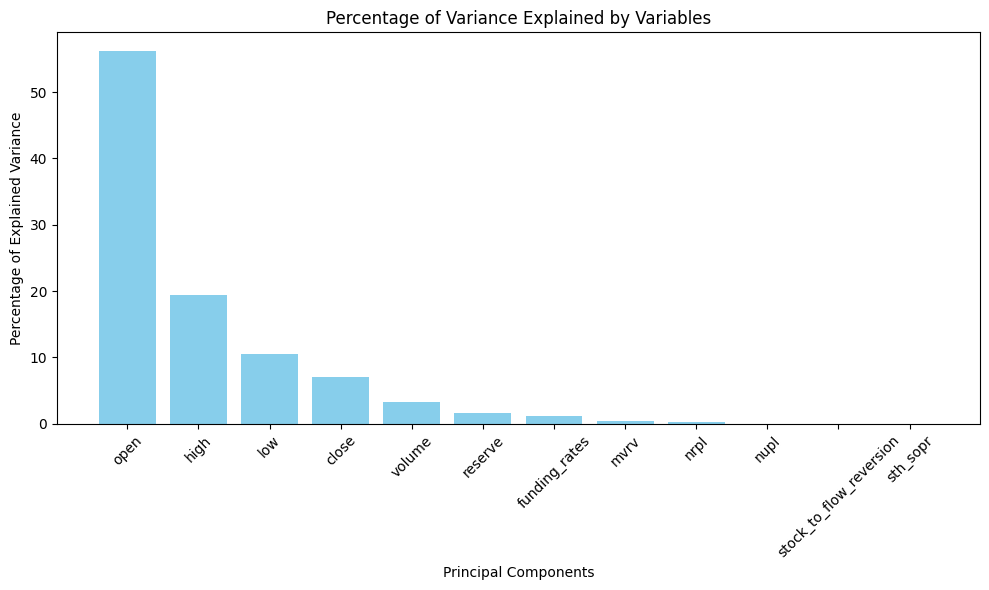


Eigenvectors:
        open      high       low     close    volume   reserve  funding_rates  \
0  -0.350530 -0.260726 -0.082589  0.008598  0.014272  0.036008      -0.021735   
1  -0.352751 -0.251562 -0.090401 -0.003044 -0.005036  0.040042      -0.027463   
2  -0.351478 -0.256343 -0.075948  0.058650  0.005278  0.042452      -0.056601   
3  -0.353754 -0.247332 -0.085924  0.029000 -0.015980  0.040194      -0.039009   
4   0.067451  0.010455 -0.569947 -0.802213 -0.141157  0.016291      -0.019605   
5  -0.188078  0.166453  0.609914 -0.429367 -0.061407  0.529211      -0.281093   
6  -0.207313  0.398723 -0.233076  0.025995  0.817095  0.229578       0.013632   
7  -0.332598  0.253566  0.086394 -0.169630  0.068947 -0.437945       0.301554   
8  -0.245849  0.380388 -0.205046  0.215652 -0.463530  0.452319       0.527201   
9  -0.315970  0.188951  0.333398 -0.207811 -0.064012 -0.471814       0.176344   
10 -0.351112 -0.219640 -0.095539  0.065377 -0.022782  0.041095      -0.208717   
11 -0.164119 

In [64]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print("Total sum of eigenvalues = ", sum(eigenvalues))

eigenvalues = pd.DataFrame(eigenvalues, index=correlation_matrix.index, columns=['Eigenvalues'])
eigenvectors = pd.DataFrame(eigenvectors, columns=df1.columns)
print("\n")
#print(eigenvalues)

######
total_variance = eigenvalues['Eigenvalues'].sum()
eigenvalues['Percentage of Variance'] = (eigenvalues['Eigenvalues'] / total_variance) * 100
print(eigenvalues)
plt.figure(figsize=(10, 6))
plt.bar(eigenvalues.index, eigenvalues['Percentage of Variance'], color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Percentage of Variance Explained by Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
######


print("\nEigenvectors:")
print(eigenvectors)

**1.4 Principal component**

For principal component, we selected open(6.74), high(2.32), low(1.27), close(0.85) have eigenvalues >1 or close to 1.

Also, they are Positive Real Eigenvalues.

Rest all other factors can be considered as multicollinearity.

In [81]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
sorted_indices = np.argsort(eigenvalues)[::-4]
sorted_eigenvalues = eigenvalues[sorted_indices]
principal_components = eigenvectors[:, sorted_indices]
principal_components

array([[-0.35053046,  0.01427241,  0.03119133],
       [-0.35275103, -0.005036  ,  0.03245583],
       [-0.3514781 ,  0.00527765,  0.03601235],
       [-0.3537544 , -0.01598039,  0.05179247],
       [ 0.06745142, -0.1411569 , -0.06702621],
       [-0.18807808, -0.06140723,  0.13285944],
       [-0.20731273,  0.81709458, -0.1473307 ],
       [-0.33259821,  0.06894727,  0.68569294],
       [-0.24584887, -0.46352973, -0.08641844],
       [-0.31596955, -0.06401154, -0.66637649],
       [-0.35111177, -0.02278238, -0.16133984],
       [-0.16411878, -0.28968602,  0.0491199 ]])

**1.5 The main component score**

In [82]:
main_component_scores = np.dot(bitcoin_std, principal_components)
print("Principal Component Scores of dimension =",main_component_scores.shape)
#main_component_scores = pd.DataFrame(main_component_scores, columns=df1.columns)
main_component_scores

Principal Component Scores of dimension = (935, 3)


array([[ 2.58620964,  0.19511985,  0.00586274],
       [ 2.59670001,  0.12585196,  0.04593735],
       [ 2.58019667,  0.03026412,  0.07117489],
       ...,
       [ 2.08772546,  0.2296747 , -0.42006059],
       [ 2.03626288,  0.08610115, -0.32534779],
       [ 2.22699764,  0.19395453, -0.34576958]])

# **2.Empirical Analysis of Logistic Model**

**2.1 Regression function**

In [83]:
 # Splitting the dataset
y = data['signal'].map({'buy': 0, 'sell': 1, 'none': 2}).astype(int)  # Encoding signals  #dependent variable
X_train, X_test, y_train, y_test = train_test_split(main_component_scores, y, test_size=0.2, random_state=42)

**2.2 Transformation of dependent varibale (y=signal(0,1,2)) to (0,1) using logistic function.**

In [68]:
y_logit = np.log(y / (1 - y))
y_logit

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      NaN
1      NaN
2     -inf
3      NaN
4      NaN
      ... 
930    NaN
931    NaN
932    NaN
933    NaN
934    NaN
Name: signal, Length: 935, dtype: float64

**2.3 Establishment of Logistic Model**

In [84]:
#class_weights = {0: 1, 1: 1, 2: 10}
logistic_model = LogisticRegression()

In [85]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

**2.4 Predict probabilities for the test data (X_test)**

In [86]:
y_pred_proba = logistic_model.predict_proba(X_test)

In [ ]:
# Print classification report
#target_names = ['buy', 'sell', 'none']
#print(classification_report(y_test, np.argmax(y_pred_proba, axis=1), target_names=target_names))

              precision    recall  f1-score   support

         buy       0.11      1.00      0.19        20
        sell       0.00      0.00      0.00        19
        none       0.00      0.00      0.00       148

    accuracy                           0.11       187
   macro avg       0.04      0.33      0.06       187
weighted avg       0.01      0.11      0.02       187



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
print("Predicted Probabilities:")
print(y_pred_proba)

Predicted Probabilities:
[[0.06340707 0.08365461 0.85293832]
 [0.08457254 0.02667713 0.88875032]
 [0.06921703 0.20052687 0.73025609]
 [0.05333639 0.10760395 0.83905967]
 [0.13050087 0.01956218 0.84993695]
 [0.07009591 0.03531779 0.89458631]
 [0.05430893 0.23475981 0.71093127]
 [0.07959733 0.0304479  0.88995476]
 [0.06187919 0.10514021 0.8329806 ]
 [0.08146723 0.04285044 0.87568234]
 [0.06461007 0.12867357 0.80671636]
 [0.10310843 0.20101339 0.69587818]
 [0.05747946 0.2444941  0.69802644]
 [0.05544259 0.23883867 0.70571874]
 [0.05049846 0.03979645 0.90970509]
 [0.10378606 0.0215385  0.87467544]
 [0.04441135 0.28983155 0.6657571 ]
 [0.1116418  0.01564472 0.87271348]
 [0.06104593 0.07675374 0.86220033]
 [0.08659803 0.22827859 0.68512338]
 [0.0709718  0.04987571 0.87915249]
 [0.06535718 0.15232143 0.78232138]
 [0.06119701 0.03673344 0.90206955]
 [0.08963224 0.03268525 0.87768251]
 [0.08104669 0.06211845 0.85683486]
 [0.07241432 0.03577663 0.89180905]
 [0.07761377 0.04098769 0.88139853]
 [0

In [ ]:
# Scaling features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Sample of plotting results

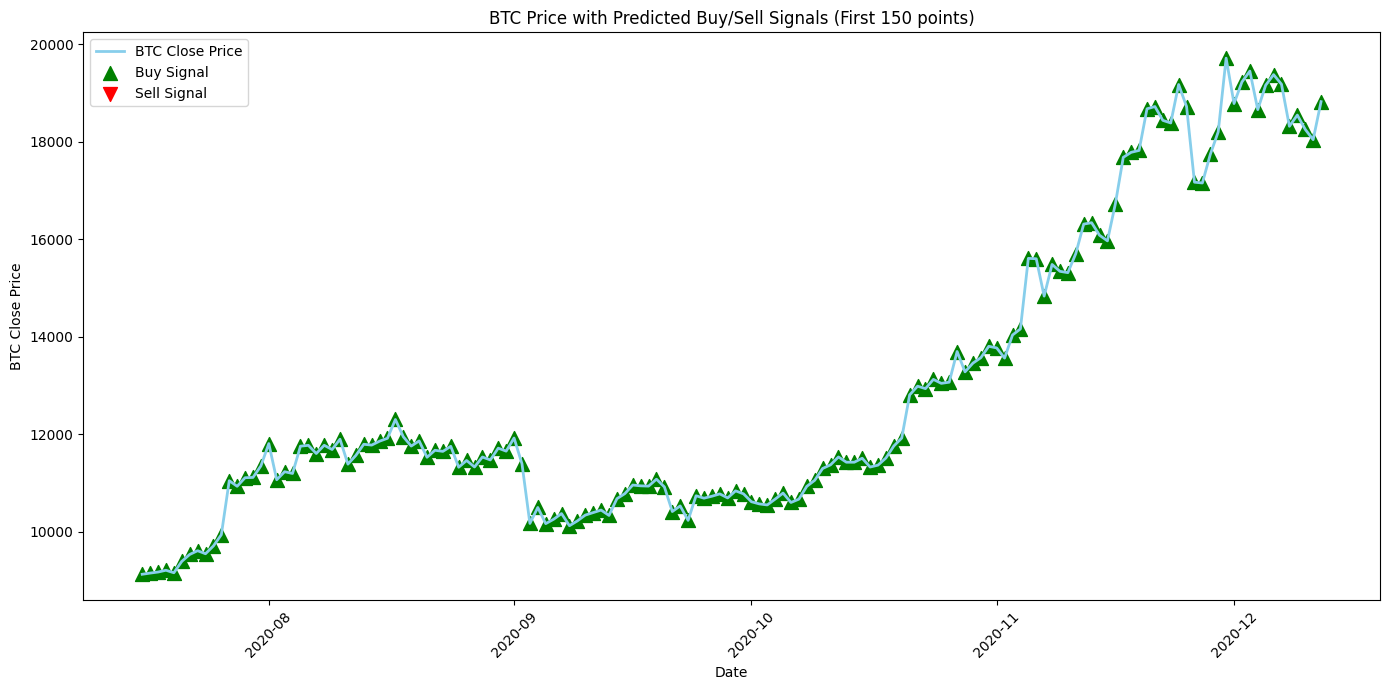

In [95]:
# Ensure datetime is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])

plt.figure(figsize=(14, 7))
plt.plot(df['datetime'][:150], df['close'][:150], label='BTC Close Price', color='skyblue', linewidth=2)

# Adjust the conditions to match the labels
# Highlight buy signals
buy_signals = df.iloc[:150][y_pred_proba[:150, 0] < 0.5]  # Assuming 0 represents 'buy'
plt.scatter(buy_signals['datetime'], buy_signals['close'], label='Buy Signal', marker='^', color='green', alpha=1, s=100)

# Highlight sell signals
sell_signals = df.iloc[:150][y_pred_proba[:150, 1] > 0.5]  # Assuming 1 represents 'sell'
plt.scatter(sell_signals['datetime'], sell_signals['close'], label='Sell Signal', marker='v', color='red', alpha=1, s=100)

plt.title('BTC Price with Predicted Buy/Sell Signals (First 150 points)')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
